## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from random import shuffle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [2]:
dir_path = '/Users/porcupine/ml-stuff/chatbotize'

model = KeyedVectors.load_word2vec_format(dir_path + "/skip_gram_v100m8.w2v.txt", binary=False)

In [3]:
def noun_to_token(word):
    return word.replace(' ', '_') + '::noun'

## 3

Using the downloaded model find the most similar word or expressions for the following expressions:

In [5]:
words = [
    "sąd wysoki", # not found
    "trybunał konstytucyjny", # not found
    "kodeks cywilny",
    "kpk",
    "sąd rejonowy", # not found
    "szkoda",
    "wypadek",
    "kolizja",
    "szkoda majątkowa",
    "nieszczęście",
    "rozwód",
]

In [6]:
for word in words:
    token = word.replace(' ', '_') + '::noun'
    try:
        most_similar = model.most_similar(positive=token)
        df = pd.DataFrame(most_similar)
        print('Expression "{0}"'.format(word))
        print(df)
    except:
        print('Expression "{0}" could not be found'.format(word))
    print('\n\n')

Expression "sąd wysoki" could not be found



Expression "trybunał konstytucyjny" could not be found



Expression "kodeks cywilny"
                                         0         1
0               ne#Kodeksu_cywilnego::noun  0.954958
1                  ne#Kodeks_Cywilny::noun  0.885815
2               ne#Kodeksie_cywilnym::noun  0.860246
3               ne#Kodeksie_Cywilnym::noun  0.850759
4               ne#kodeksu_cywilnego::noun  0.847410
5                    kodeks_handlowy::noun  0.837190
6                       kodeks_pracy::noun  0.837182
7               ne#Kodeksu_Cywilnego::noun  0.832519
8  ne#Kodeksu_postępowania_cywilnego::noun  0.818488
9                  ne#Kodeks_cywilny::noun  0.818418



Expression "kpk"
                                                   0         1
0              ne#Kodeksu_postępowania_karnego::noun  0.866112
1                                           kpk::adj  0.861731
2                                          kpc::noun  0.853696
3            

In [7]:
model.most_similar("ne#Sądu_rejonowego::noun")

[('ne#Elektronicznym_Postępowaniu_Upominawczym::noun', 0.8824101686477661),
 ('rejonoweg::adj', 0.8811922073364258),
 ('ne#NSA_Ośrodek_Zamiejscowy::noun', 0.878535807132721),
 ('ne#Sądu_Okręgowego_Warszawa-Praga::noun', 0.8777221441268921),
 ('ne#Sądu_Rejonowego_w_Szamotułach::noun', 0.8722273707389832),
 ('ne#Sadu_Okręgowego::noun', 0.8684071898460388),
 ('ne#Wydział_IX_Gospodarczy::noun', 0.8683867454528809),
 ('ne#Sądu_Rejonowego_w_Płocku::noun', 0.8683465123176575),
 ('ne#Naczelny_Sąd_Administracyjny_--_Ośrodek_Zamiejscowy::noun',
  0.8677822351455688),
 ('ne#VI_Wydział_Cywilny::noun', 0.8675817251205444)]

In [9]:
model.most_similar("ne#Trybunał_konstytucyjny::noun")

[('ne#Trybunału_Kostytucyjnego::noun', 0.8643284440040588),
 ('antykonstytucyjność::noun', 0.8617954254150391),
 ('ne#Senator_Gołąbek::noun', 0.8617493510246277),
 ('ne#K._Świrydowicz::noun', 0.8613615036010742),
 ('ne#Naczelny_Sąd_Administracyjny_i_Sąd_Najwyższy::noun', 0.860981285572052),
 ('ne#Trybunału_Konstytucyjnego_Rzecznik_Praw_Obywatelskich::noun',
  0.8583897352218628),
 ('ne#Gdański_Sąd_Apelacyjny::noun', 0.8557641506195068),
 ('ne#Jeśli_Sąd_Najwyższy::noun', 0.8553991913795471),
 ('niekonstytucjonalność::noun', 0.8551596403121948),
 ('konwalidowane::adj', 0.8551172018051147)]

In [10]:
model.most_similar("ne#Sąd_Najwyższy::noun")

[('ne#Trybunał_Konstytucyjny::noun', 0.917099118232727),
 ('ne#Naczelny_Sąd_Administracyjny::noun', 0.9122671484947205),
 ('ne#Sąd_Apelacyjny::noun', 0.8624408841133118),
 ('sąd_pierwszej_instancji::noun', 0.8516271710395813),
 ('sąd_drugiej_instancji::noun', 0.8421329855918884),
 ('ne#Trybunał::noun', 0.8357682228088379),
 ('ne#Wojewódzki_Sąd_Administracyjny::noun', 0.8291582465171814),
 ('ne#Sąd_Apelacyjny_w_Katowicach::noun', 0.828294038772583),
 ('ne#Trybunał_Federalny::noun', 0.8242061138153076),
 ('ne#Europejski_Trybunał_Sprawiedliwości::noun', 0.8191901445388794)]

## 4 

Find the result of the following equations (5 top results):
- sąd wysoki - kpc + konstytucja
- pasażer - mężczyzna + kobieta
- samochód - droga + rzeka

In [5]:
equations = [
    (['ne#Sąd_Najwyższy', 'konstytucja'], ['kpc']),
    (['pasażer', 'mężczyzna'], ['kobieta']),
    (['samochód', 'rzeka'], ['droga']),
]

In [6]:
for (positive, negative) in equations:
    positive_tokens = list(map(noun_to_token, positive))
    negative_tokens = list(map(noun_to_token, negative))
    
    try:
        most_similar = model.most_similar(positive_tokens, negative_tokens)
        df = pd.DataFrame(most_similar)
        print('{0} - {1} + {2} = '.format(positive[0], positive[1], negative[0]))
        print(df)
    except Exception as e:
        print(e)
    print('\n\n')
    


ne#Sąd_Najwyższy - konstytucja + kpc = 
                                                0         1
0                 ne#Trybunał_Konstytucyjny::noun  0.748630
1                      ne#Sąd_Konstytucyjny::noun  0.724568
2     ne#Sąd_Najwyższy_Stanów_Zjednoczonych::noun  0.724155
3                              konstytucyjny::adj  0.712673
4                  ne#Zgromadzenie_Narodowe::noun  0.707471
5                         ustawa_zasadnicza::noun  0.705975
6                           ne#Rada_Państwa::noun  0.705920
7       ne#Federalny_Trybunał_Konstytucyjny::noun  0.698019
8                               ne#Trybunał::noun  0.691338
9  ne#Konstytucję_Rzeczypospolitej_Polskiej::noun  0.679219



pasażer - mężczyzna + kobieta = 
                    0         1
0      kierowca::noun  0.828540
1         pilot::noun  0.785647
2      bagażowy::noun  0.779272
3  współpasażer::noun  0.761635
4        pojazd::noun  0.757603
5      podróżny::noun  0.755888
6    wsiadający::noun  0.750313
7    cię

## 5

Using the t-SNE algorithm comput the projection of the random 1000 words with the following words highlighted (assuming they are available):

In [11]:
words = [
    "szkoda",
    "strata",
    "uszczerbek",
    "szkoda majątkowa",
#     "uszczerbek na zdrowie",
    "Krzywda",
    "niesprawiedliwość",
    "nieszczęście",
]

In [12]:
vocab=list(model.vocab)

In [13]:
def random_sample(vocab, n=1000):
    tmp = vocab[:]
    shuffle(tmp)
    return tmp[:n]

In [14]:
def to_matrix(words):
    word_vecs = [model.get_vector(word) for word in words]
    return np.array(word_vecs)

In [15]:
def test(additional_words, vocab, alg, n=1000):
    c = np.concatenate([
        np.zeros(n),
        np.ones(len(additional_words))
    ])
    
    plt.figure(1, figsize=(18,12))
    
    for i in range(1, 5):
        sample=random_sample(vocab, n)
        special_tokens=map(noun_to_token, additional_words)
        x = np.row_stack([to_matrix(sample), to_matrix(special_tokens)])
        X = alg().fit_transform(x)
        
        plt.subplot(220 + i)
        plt.scatter(X[:,0], X[:,1], c=c)
        
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    
    plt.show()

### t-SNE
---

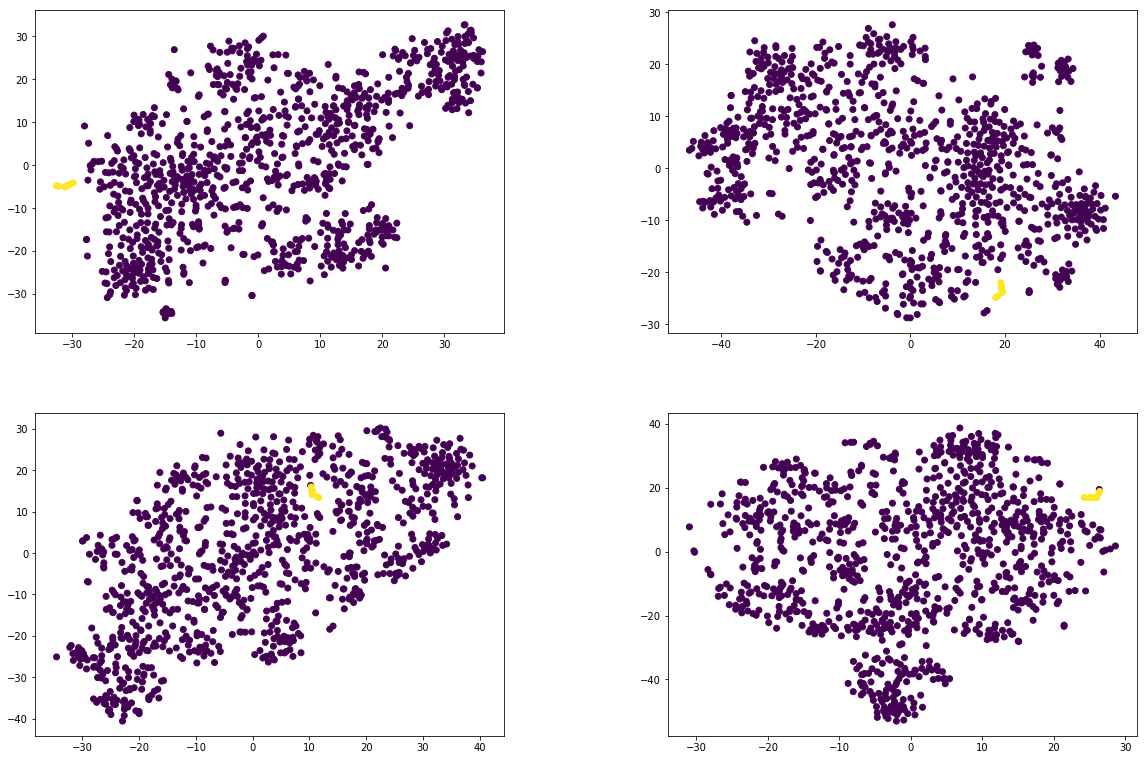

In [16]:
test(words, vocab, alg=TSNE)

### PCA
---

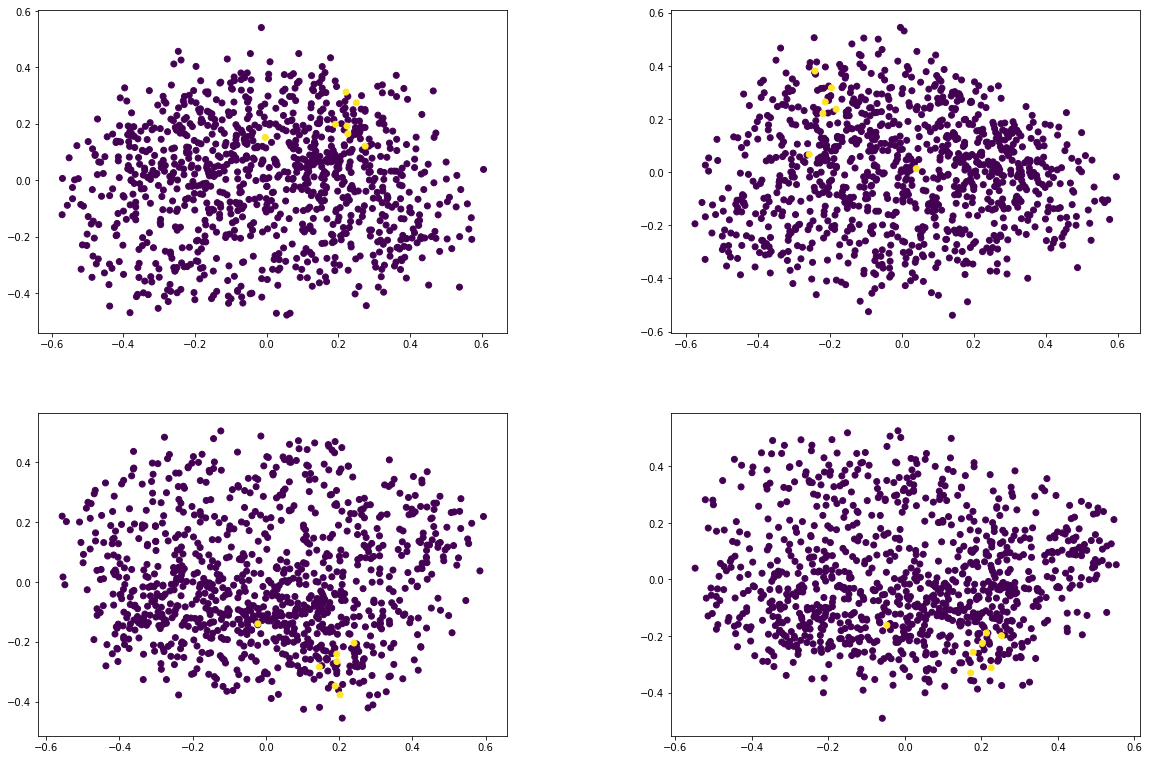

In [17]:
test(words, vocab, alg=PCA)

In [216]:
def plot(X, special_count):
    c = np.concatenate([
        np.zeros(len(X) - special_count),
        np.ones(special_count)
    ])
    
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], c=c)

    for i, txt in enumerate(words):
        idx = 1000+i
        ax.annotate(txt, (X[idx,0], X[idx,1]))
        
    fig.set_size_inches(18.5, 10.5)
    plt.show()

In [217]:
def generate_and_plot(words, n=1000):
    sample=random_sample(vocab, 1000)
    special_tokens=map(noun_to_token, words)
    x = np.row_stack([to_matrix(sample), to_matrix(special_tokens)])
    X = PCA().fit_transform(x)
    plot(X, len(words))

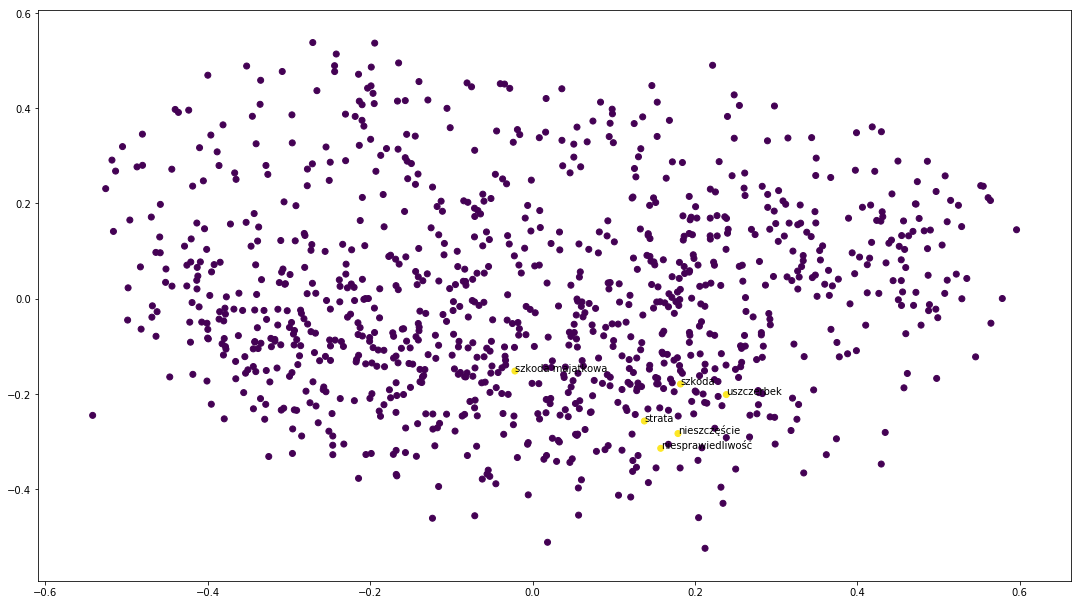

In [218]:
generate_and_plot(words)